In [2]:
!pip install tensorflow matplotlib numpy pandas scikit-learn

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [199]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to training and validation folders
train_dir = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train"
val_dir = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\validation"

# Image preprocessing settings
img_height, img_width = 224, 224
batch_size = 32

# Define separate generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Load validation data
val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 894 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [201]:
print("Train classes:", train_data.class_indices)
print("Validation classes:", val_data.class_indices)

Train classes: {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}
Validation classes: {'bacterial_leaf_blight': 0, 'brown_spot': 1, 'healthy': 2}


In [203]:
import os
for cls in os.listdir(val_dir):
    print(cls, len(os.listdir(os.path.join(val_dir, cls))))

bacterial_leaf_blight 75
brown_spot 75
healthy 75


In [187]:
# import os
# import random
# import shutil

# # Set your absolute base path here
# dataset_dir = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease"

# # List folders in dataset_dir to debug
# print("✅ Checking contents of dataset directory...")
# print(os.listdir(dataset_dir))

# # Auto-detect train and val directories
# possible_train_dirs = ['train', 'Train', 'training', 'Training']
# possible_val_dirs = ['val', 'Val', 'validation', 'Validation']

# train_dir = None
# val_dir = None

# # Detect correct train dir
# for name in possible_train_dirs:
#     path = os.path.join(dataset_dir, name)
#     if os.path.exists(path):
#         train_dir = path
#         break

# # Detect correct val dir
# for name in possible_val_dirs:
#     path = os.path.join(dataset_dir, name)
#     if os.path.exists(path):
#         val_dir = path
#         break

# # Check if found
# if not train_dir or not val_dir:
#     raise FileNotFoundError("❌ Could not find 'train' or 'val' folder. Please check your directory.")

# test_dir = os.path.join(dataset_dir, 'test')
# os.makedirs(test_dir, exist_ok=True)

# print(f"✅ Using train dir: {train_dir}")
# print(f"✅ Using val dir: {val_dir}")
# print(f"✅ Test dir will be: {test_dir}")

# # Ratio to move
# split_ratio = 0.15

# # Function to move images class-wise
# def move_classwise_images(source_root, target_root, ratio):
#     for class_name in os.listdir(source_root):
#         source_class_path = os.path.join(source_root, class_name)
#         target_class_path = os.path.join(target_root, class_name)
# 
#         if not os.path.isdir(source_class_path):
#             continue

#         os.makedirs(target_class_path, exist_ok=True)

#         images = [
#             f for f in os.listdir(source_class_path)
#             if os.path.isfile(os.path.join(source_class_path, f))
#         ]
#         random.shuffle(images)

#         num_to_move = int(len(images) * ratio)
#         print(f"➡️ Moving {num_to_move} images from '{class_name}'...")

#         for img in images[:num_to_move]:
#             src = os.path.join(source_class_path, img)
#             dst = os.path.join(target_class_path, img)
#             shutil.move(src, dst)

# # Apply to train and val
# move_classwise_images(train_dir, test_dir, split_ratio)
# move_classwise_images(val_dir, test_dir, split_ratio)

# print("✅ Done! Test set created successfully from train and val data.")



✅ Checking contents of dataset directory...
['train', 'validation']
✅ Using train dir: C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train
✅ Using val dir: C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\validation
✅ Test dir will be: C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test
➡️ Moving 52 images from 'bacterial_leaf_blight'...
➡️ Moving 52 images from 'brown_spot'...
➡️ Moving 52 images from 'healthy'...
➡️ Moving 13 images from 'bacterial_leaf_blight'...
➡️ Moving 13 images from 'brown_spot'...
➡️ Moving 13 images from 'healthy'...
✅ Done! Test set created successfully from train and val data.


In [205]:
import os
for cls in os.listdir(train_dir):
    print(cls, len(os.listdir(os.path.join(train_dir, cls))))

bacterial_leaf_blight 298
brown_spot 298
healthy 298


In [207]:
#directory
source_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease'
train_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease/train'
val_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease/validation'
test_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease/test'

In [209]:
from tensorflow.keras.preprocessing.image import img_to_array
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
def visualize_images_from_dir_grid(directory, num_images=20, images_per_row=4):
    """
    Visualizes images from a directory in a grid format.

    Parameters:
    - directory: Path to the dataset directory.
    - num_images: Total number of images to display.
    - images_per_row: Number of images to display per row.
    """
    classes = os.listdir(directory)
    classes = [cls for cls in classes if os.path.isdir(os.path.join(directory, cls))]

    print(f"Classes: {classes}")

    # Calculate the number of rows
    num_rows = num_images // images_per_row + int(num_images % images_per_row != 0)

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 3, num_rows * 3))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    for i in range(num_images):
        # Randomly select a class
        selected_class = random.choice(classes)
        class_dir = os.path.join(directory, selected_class)

        # Randomly select an image from the class
        image_name = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_name)

        # Load and display the image
        img = load_img(image_path, target_size=(224, 224))  # Resize for consistency
        img_array = img_to_array(img) / 255.0  # Normalize for better visualization

        axes[i].imshow(img_array)
        axes[i].set_title(selected_class)
        axes[i].axis('off')

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


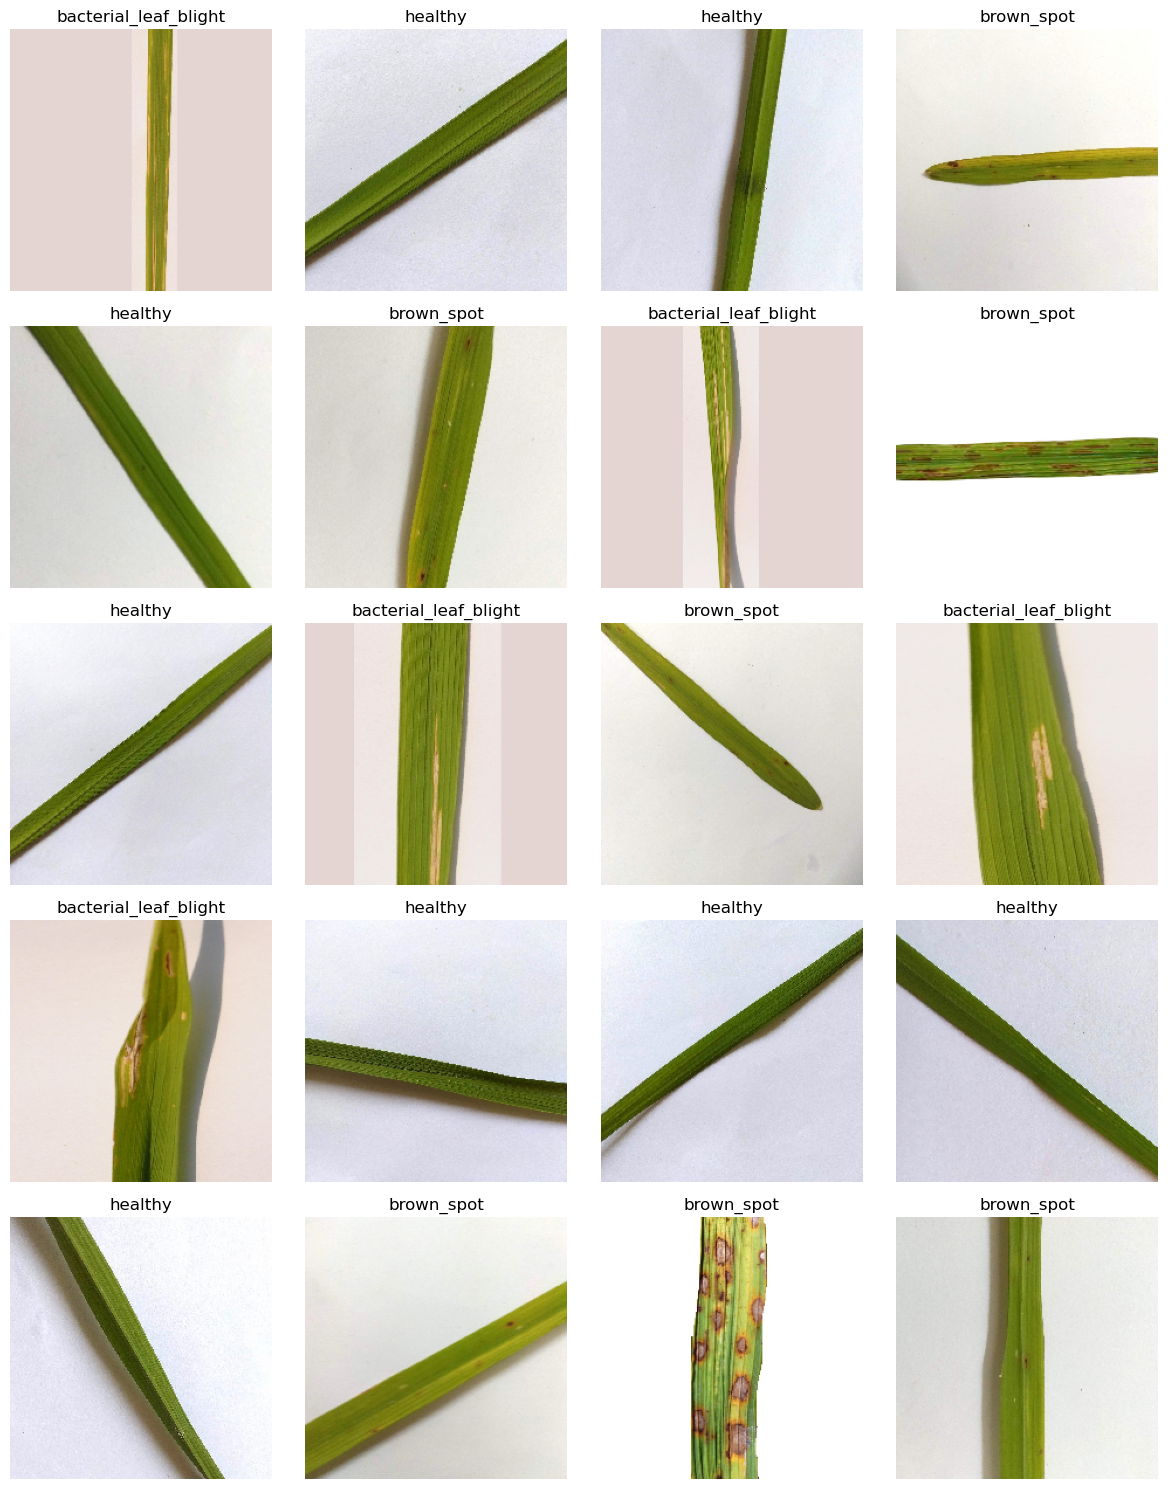

In [211]:
train_dir = r'C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train'
visualize_images_from_dir_grid(train_dir, num_images=20, images_per_row=4)

Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


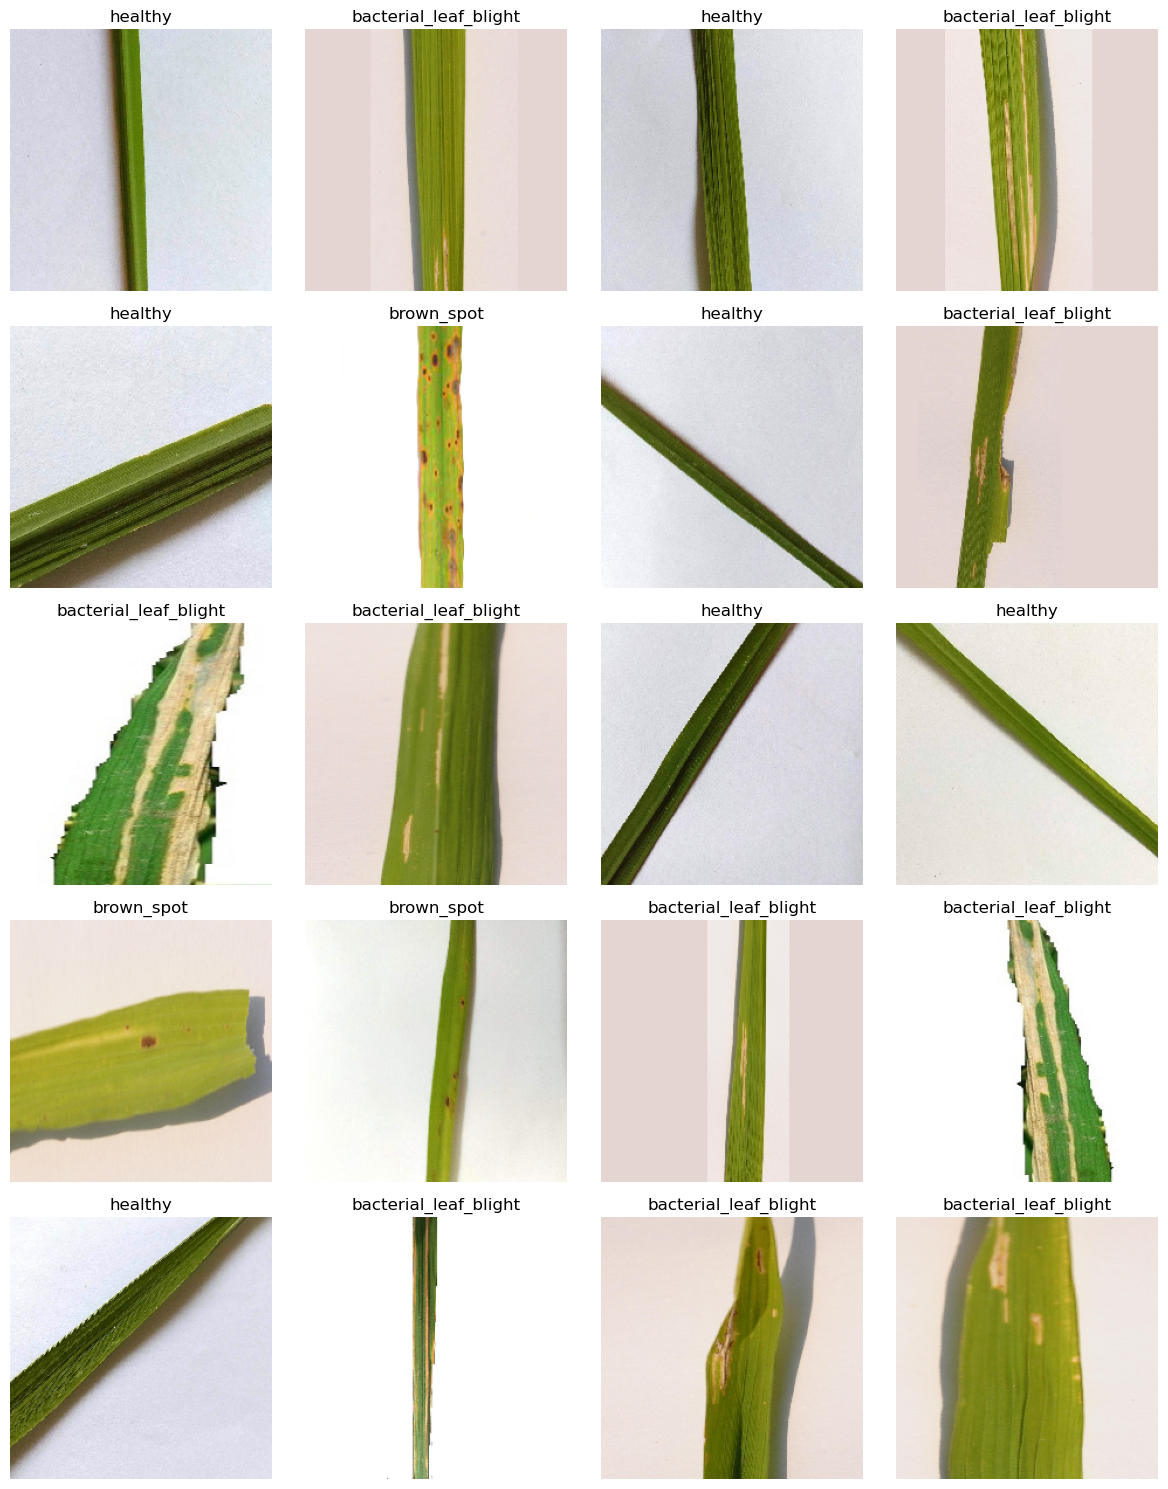

In [23]:
valid_dir =r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\validation"
visualize_images_from_dir_grid(valid_dir, num_images=20, images_per_row=4)

Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy']


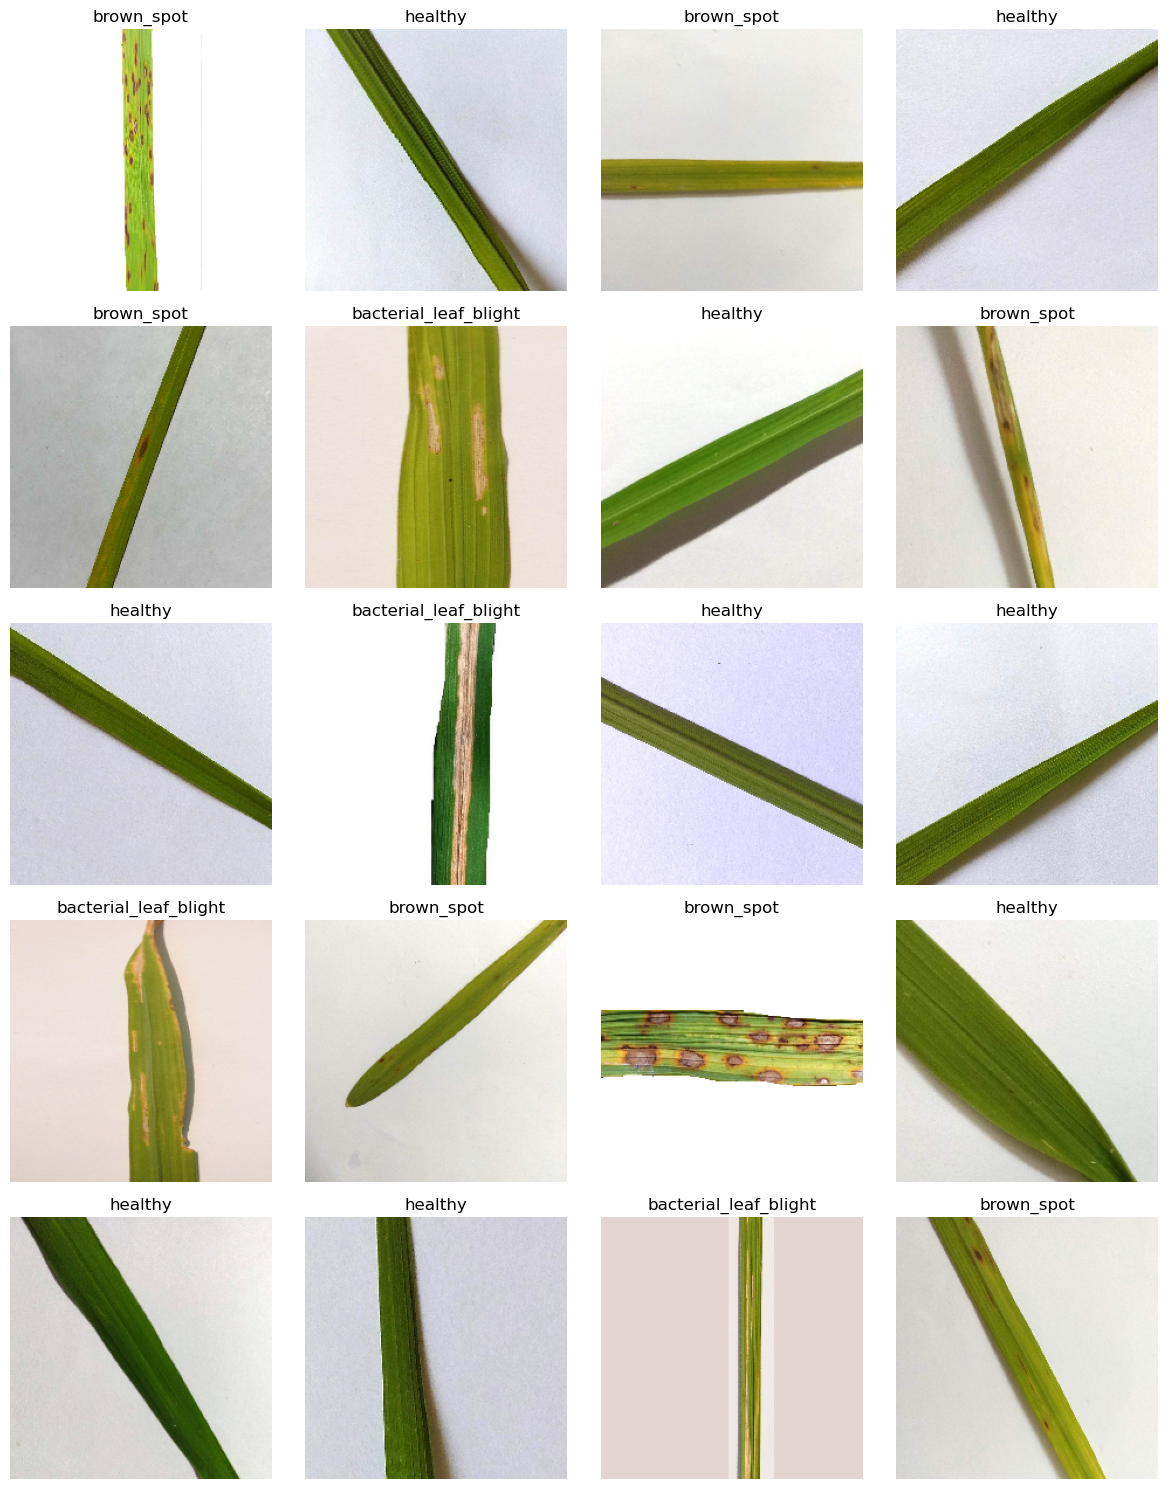

In [25]:
test_dir= r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test"
visualize_images_from_dir_grid(test_dir, num_images=20, images_per_row=4)

In [392]:
import tensorflow as tf

IMAGE_SIZE = 224
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1314 files belonging to 3 classes.


In [402]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train",
    image_size=(224, 224),
    batch_size=32
)

Found 894 files belonging to 3 classes.


In [404]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'brown_spot', 'healthy']


In [330]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[1 1 2 1 0 1 0 0 2 0 1 1 1 1 1 1 1 1 1 0 2 1 1 2 1 1 2 0 2 2 2 1]


In [332]:
len(dataset)

42

In [334]:
train_size = 0.8
len(dataset)*train_size

33.6

In [336]:
train_ds = dataset.take(33)
len(train_ds)


6

In [338]:
test_ds = dataset.skip(33)
len(test_ds)

9

In [340]:
val_size=0.1
len(dataset)*val_size


4.2

In [342]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [344]:
test_ds = test_ds.skip(4)
len(test_ds)


5

In [346]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [348]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [350]:
len(train_ds)

33

In [352]:
len(val_ds)


4

In [354]:
len(test_ds)


5

In [356]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [358]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


In [360]:

from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [362]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [364]:
image_size=[IMAGE_SIZE,IMAGE_SIZE]
n_classes = 9

resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(n_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,490,889 (93.43 MB)

 Trainable params: 903,177 (3.45 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [368]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [456]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6240 - loss: 1.7161 - val_accuracy: 0.3125 - val_loss: 6.1160
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9630 - loss: 0.1199 - val_accuracy: 0.3047 - val_loss: 8.1962
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9955 - loss: 0.0276 - val_accuracy: 0.3047 - val_loss: 7.5002
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.3047 - val_loss: 7.7097
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.3047 - val_loss: 7.6823
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.3047 - val_loss: 7.7958


In [458]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='besst_model.h5',       # file to save
    monitor='val_loss',             # what to monitor (e.g., 'val_accuracy' or 'val_loss')
    save_best_only=True,            # only save when it’s the best
    mode='min',                     # 'min' for loss, 'max' for accuracy
    verbose=1
)


In [520]:
model.save('besst_model.keras')

In [460]:
history
history.params
history.history.keys()
type(history.history['loss'])
len(history.history['loss'])
history.history['loss'][:5] # show loss for first 5 epochs

[0.9979249238967896,
 0.07778776437044144,
 0.027362056076526642,
 0.008549317717552185,
 0.005374346859753132]

In [462]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [464]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS = len(acc)

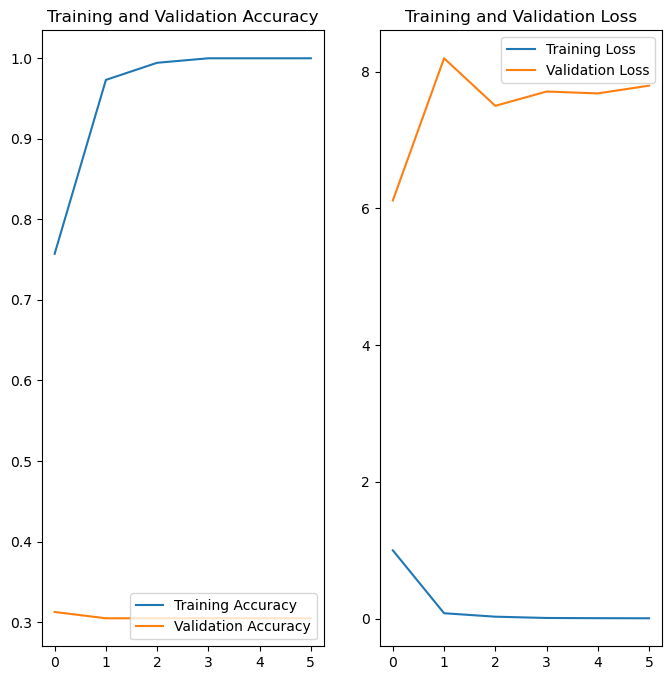

In [466]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: brown_spot


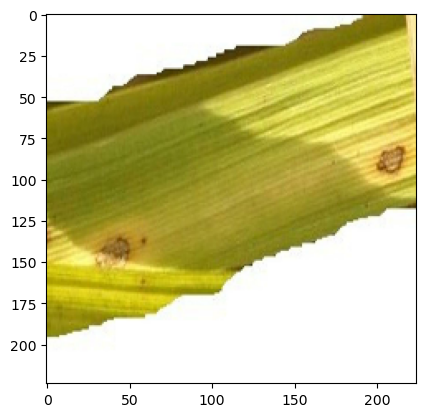

In [476]:
import numpy as np
import matplotlib.pyplot as plt
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [478]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


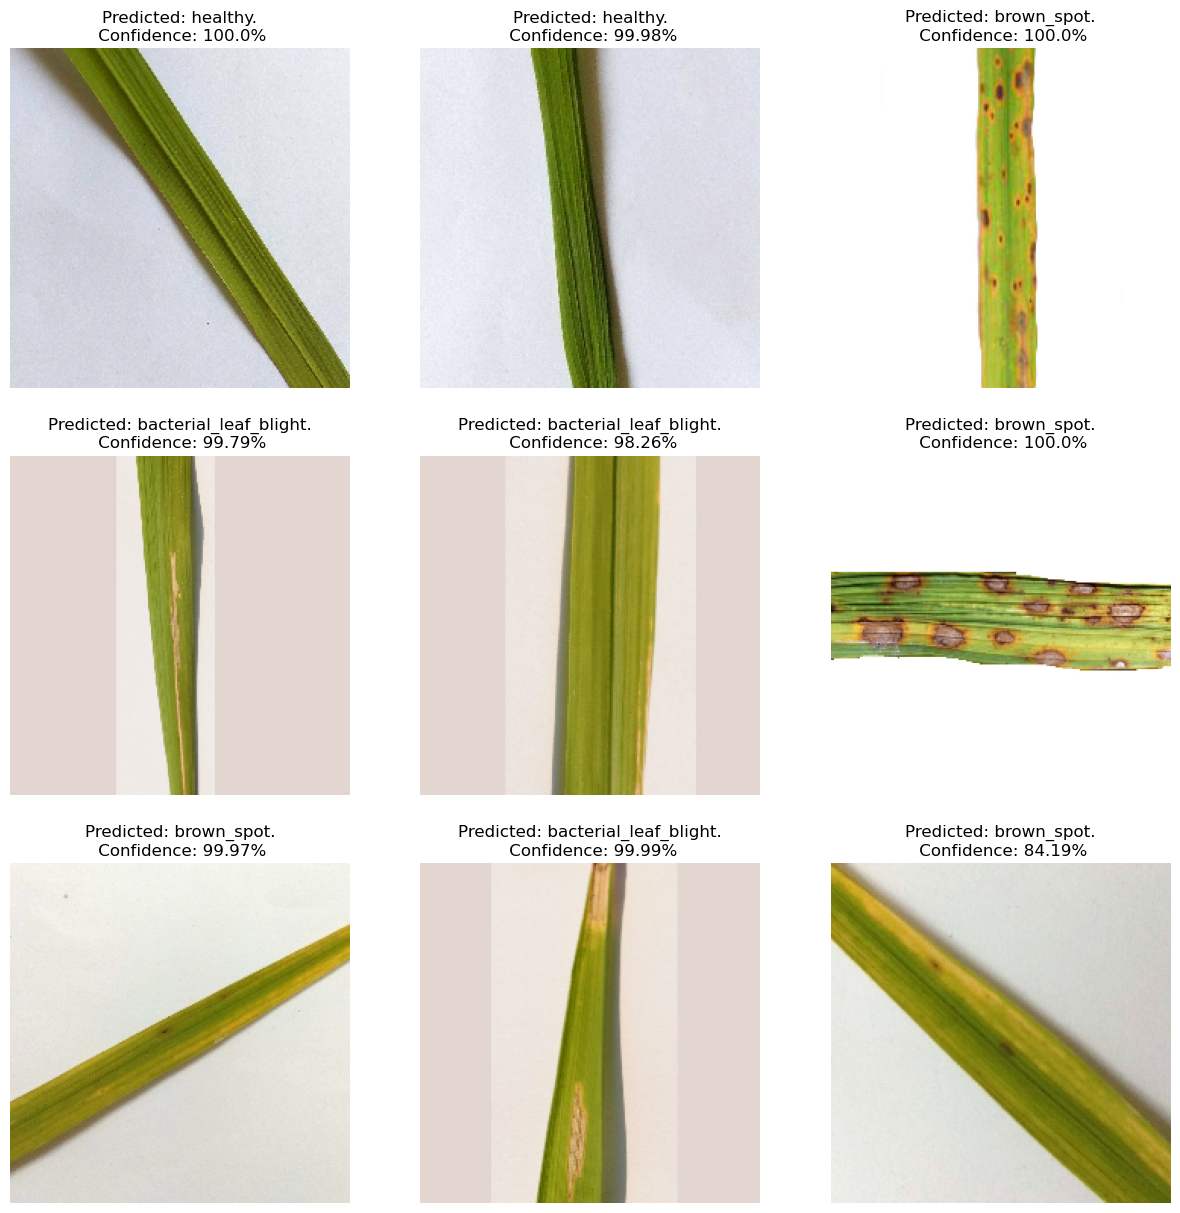

In [514]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [510]:
print(model.output_shape)


(None, 9)


In [512]:
print("Done")

Done
